<a href="https://colab.research.google.com/github/SiddhantV369/predictive-modelling/blob/main/Logisitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris=pd.DataFrame(load_iris().data)
targets=pd.Series(load_iris().target)


In [101]:

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticReg():

    def __init__(self, lr=0.001, n_iters=1000, num_classes=2):
        self.lr = lr
        self.n_iters = n_iters
        self.num_classes = num_classes
        self.weights = []
        self.bias = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = []
        self.bias = []

        for i in range(self.num_classes):
            binary_y = (y == i).astype(int)

            w = np.zeros(n_features)
            b = 0

            for _ in range(self.n_iters):
                linear_pred = np.dot(X, w) + b
                predictions = sigmoid(linear_pred)

                dw = (1/n_samples) * np.dot(X.T, (predictions - binary_y))
                db = (1/n_samples) * np.sum(predictions-binary_y)

                w = w - self.lr*dw
                b = b - self.lr*db

            self.weights.append(w)
            self.bias.append(b)


    def predict(self, X):
        predictions = []
        for i in range(self.num_classes):
            linear_pred = np.dot(X, self.weights[i]) + self.bias[i]
            predictions.append(sigmoid(linear_pred))

        predictions = np.array(predictions).T
        class_pred = np.argmax(predictions, axis=1)
        return class_pred

In [102]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = iris
y = targets

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
myReg=LogisticReg(lr=0.1, num_classes=3)

myReg.fit(xtrain,ytrain)

ypred=myReg.predict(xtest)
print(ypred)


def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

acc = accuracy(ypred, ytest)
print(f"Accuracy: {acc}")

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 1.0


Confusion Matrix:


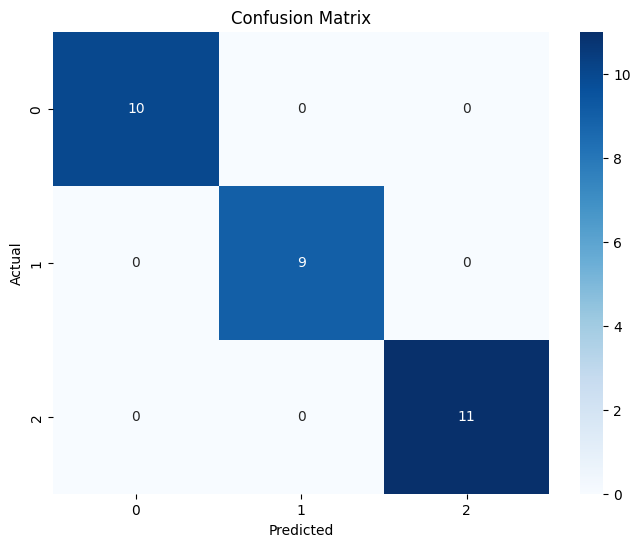

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9666666666666667
Confusion Matrix:


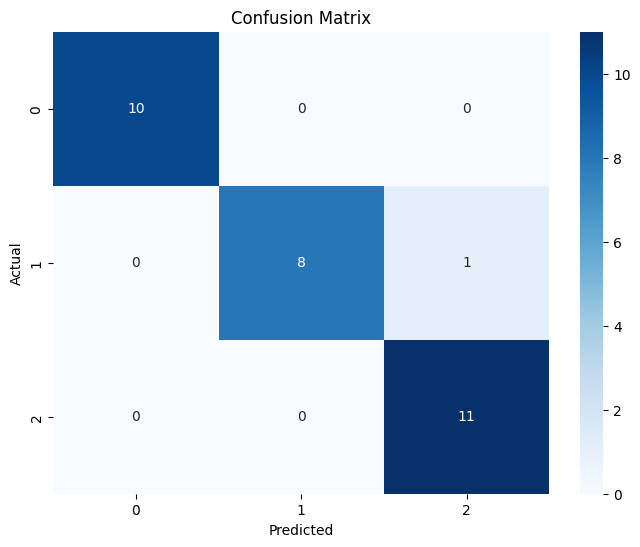

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


sk_model = LogisticRegression(multi_class='ovr')
sk_model.fit(xtrain, ytrain)
sk_ypred = sk_model.predict(xtest)

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

acc = accuracy(sk_ypred, ytest)
print(f"Accuracy: {acc}")

# confusion matrix
cm = confusion_matrix(ytest,sk_ypred)
print("Confusion Matrix:")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()






In [105]:
print("custom model: \n",classification_report(ytest,ypred))
print()
print("Sk learn model: \n",classification_report(ytest,sk_ypred))

custom model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Sk learn model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

